In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from src.data.importer import *
from src.data.processer import *
from src.events.main import sim_events, list_of_params
from src.probability.functions import ic_params_nsi,perform_chisq
from plotter import P_over_E_parameter, oscillogram
from scipy.stats import chi2
from src.events.event_processing import *
import pickle
from multiprocessing import Pool
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
np.set_printoptions(linewidth=200)
np.set_printoptions(suppress=True)

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [13]:
IC_range = np.logspace(np.log10(500),4,50)
DC_range = np.logspace(np.log10(5.6),np.log10(56),50)
#ett_range = [-0.1,0,0.1]#np.linspace(-1e-1,1e-1,3)
emm_range = [-1e-1,0,1e-1]#np.linspace(-1e-1,1e-1,3)
emt_range = [-0.05,0,0.05]
params = ic_params_nsi.copy()
anti=True
s24_range = [0.032]
params.update({'theta_24': np.arcsin(np.sqrt(0.032))/2, 'dm_41':0.93, 'theta_34': np.arcsin(np.sqrt(0))/2})
emm_params = list_of_params_nsi(params, s24_range, emm_range)
emt_params = list_of_params_nsi(params, s24_range, [0],emt_range)
both_params = list_of_params_nsi(params, s24_range, emm_range,emt_range)
zenith = -1

Pmm_emm_IC = P_over_E_parameter('m',emm_params,E=IC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_range),-1)
Pmm_emt_IC = P_over_E_parameter('m',emt_params,E=IC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)
Pmm_IC = P_over_E_parameter('m',[params],E=IC_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
'''
#Pmm_emm_DC = P_over_E_parameter('m',emm_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_range),-1)
#Pmm_emt_DC = P_over_E_parameter('m',emt_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)
#Pmm_DC = P_over_E_parameter('m',[params],E=DC_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
'''

"\n#Pmm_emm_DC = P_over_E_parameter('m',emm_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_range),-1)\n#Pmm_emt_DC = P_over_E_parameter('m',emt_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)\n#Pmm_DC = P_over_E_parameter('m',[params],E=DC_range, ndim=4, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)\n"

In [14]:
Pmm_both_IC = P_over_E_parameter('m',both_params,E=IC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_params)*len(emt_params),-1)
#Pmm_both_DC = P_over_E_parameter('m',both_params,E=DC_range, ndim=4, nsi=True, anti=anti,zenith=zenith)[:,1,:].reshape(len(emm_params)*len(emt_params),-1)

Text(0.5, 1.0, '$P_{\\bar{\\mu}\\bar{\\mu}}\\,$ DC, $\\varepsilon_{\\mu\\mu} =0$')

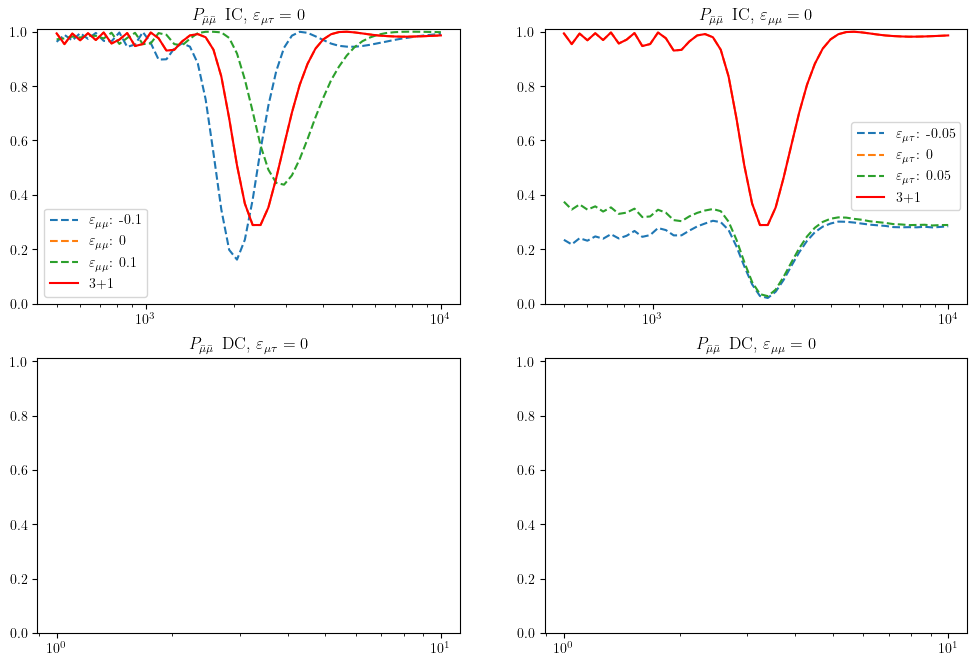

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax = ax.flatten()
#plt.plot(E_range, Pmm_3gen, label='$3 \\nu$', c='black', ls='dashed')
for p in range(Pmm_emm_IC.shape[0]):
    ax[0].plot(IC_range, Pmm_emm_IC[p,:], ls='dashed', label='$\\varepsilon_{\\mu\\mu}$:' +f' {np.round(emm_params[p]["e_mm"],2)}')
    ax[1].plot(IC_range, Pmm_emt_IC[p,:], ls='dashed', label='$\\varepsilon_{\\mu\\tau}$:' +f' {np.round(emt_params[p]["e_mt"],2)}')
    #ax[2].plot(DC_range, Pmm_emm_DC[p,:], ls='dashed', label='$\\varepsilon_{\\mu\\mu}$:' +f' {np.round(emm_params[p]["e_mm"],2)}')
    #ax[3].plot(DC_range, Pmm_emt_DC[p,:], ls='dashed', label='$\\varepsilon_{\\mu\\tau}$:' +f' {np.round(emt_params[p]["e_mt"],2)}')
ax[0].plot(IC_range, Pmm_IC, label='3+1',c='red')
ax[1].plot(IC_range, Pmm_IC, label='3+1',c='red')
#ax[2].plot(DC_range, Pmm_DC, label='3+1',c='red')
#ax[3].plot(DC_range, Pmm_DC, label='3+1',c='red')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[0].set_ylim((0,1.01))
ax[1].set_ylim((0,1.01))
ax[2].set_ylim((0,1.01))
ax[3].set_ylim((0,1.01))
ax[0].legend()
ax[1].legend()

ax[0].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ IC, $\varepsilon_{\mu\tau} =0$', fontsize=12)
ax[1].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ IC, $\varepsilon_{\mu\mu} =0$', fontsize=12)
ax[2].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ DC, $\varepsilon_{\mu\tau} =0$', fontsize=12)
ax[3].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ DC, $\varepsilon_{\mu\mu} =0$', fontsize=12)


In [68]:
Pmm_emm_IC

array([0.994, 0.953, 0.994, 0.967, 0.995, 0.968, 0.997, 0.96 , 0.966, 0.997, 0.952, 0.95 , 0.995, 0.982, 0.937, 0.933, 0.962, 0.986, 0.993, 0.986, 0.952, 0.866, 0.728, 0.559, 0.411, 0.319, 0.295,
       0.34 , 0.434, 0.548, 0.669, 0.772, 0.856, 0.917, 0.957, 0.982, 0.995, 1.   , 0.999, 0.997, 0.993, 0.99 , 0.987, 0.986, 0.985, 0.984, 0.984, 0.985, 0.986, 0.987])

Text(40.0, 0.1, '$\\varepsilon_{\\mu\\tau} = -0.01$')

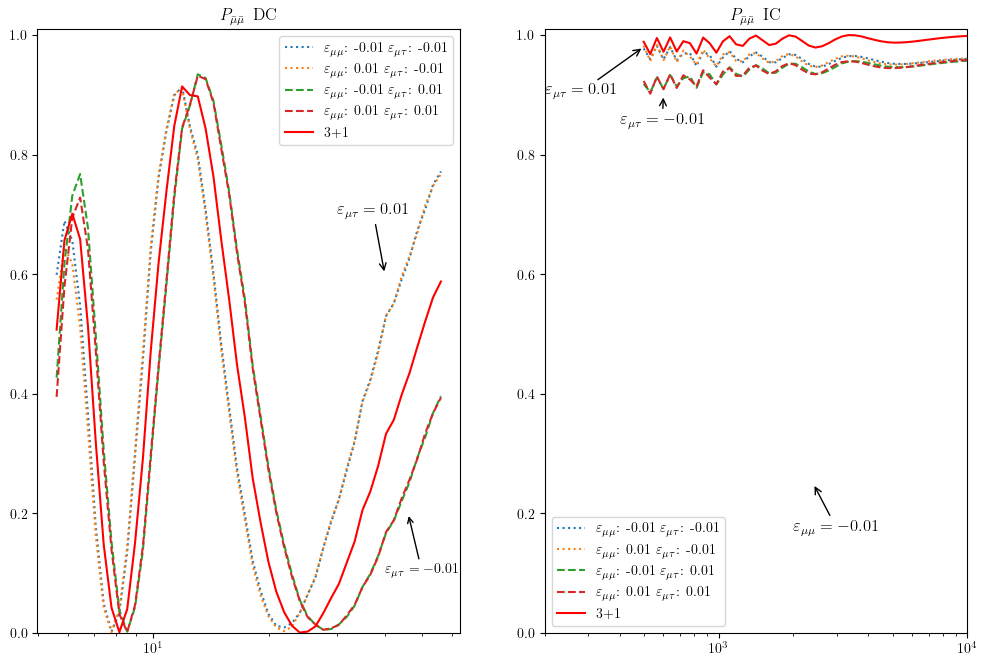

In [111]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax = ax.flatten()
ls = {0:'dotted', 2:'dotted', 6:'dashed', 8:'dashed'}
#plt.plot(E_range, Pmm_3gen, label='$3 \\nu$', c='black', ls='dashed')
for p in [0,2,6,8]:#range(len(both_params)):
    ax[0].plot(DC_range, Pmm_both_DC[p,:], ls=ls[p], label='$\\varepsilon_{\\mu\\mu}$:' +f' {np.round(both_params[p]["e_mm"],2)} '+ '$\\varepsilon_{\\mu\\tau}$:' +f' {np.round(both_params[p]["e_mt"],2)}')
    ax[1].plot(IC_range, Pmm_both_IC[p,:], ls=ls[p], label='$\\varepsilon_{\\mu\\mu}$:' +f' {np.round(both_params[p]["e_mm"],2)} ' + '$\\varepsilon_{\\mu\\tau}$:' +f' {np.round(both_params[p]["e_mt"],2)}')
ax[0].plot(DC_range, Pmm_DC, label='3+1',c='red')
ax[1].plot(IC_range, Pmm_IC, label='3+1',c='red')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylim((0,1.01))
ax[1].set_xlim((2e2,1e4))
ax[1].set_ylim((0,1.01))
ax[0].legend()
ax[1].legend()

ax[0].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ DC', fontsize=12)
ax[1].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ IC', fontsize=12)

ax[1].annotate(r'$\varepsilon_{\mu\tau} = -0.01$', xy=(6e2, 0.9),
             xycoords='data',
             xytext=(4e2, 0.85),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
ax[1].annotate(r'$\varepsilon_{\mu\tau} = 0.01$', xy=(5e2, 0.98),
             xycoords='data',
             xytext=(2e2, 0.9),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
ax[1].annotate(r'$\varepsilon_{\mu\mu} = -0.01$', xy=(2.4e3, 0.25),
             xycoords='data',
             xytext=(2e3, 0.17),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))



ax[0].annotate(r'$\varepsilon_{\mu\tau} = 0.01$', xy=(4e1, 0.60),
             xycoords='data',
             xytext=(3e1, 0.7),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
ax[0].annotate(r'$\varepsilon_{\mu\tau} = -0.01$', xy=(4.6e1, 0.2),
             xycoords='data',
             xytext=(4e1, 0.1),
             fontsize=10,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
                             


In [ ]:

'''
One at a time:
    DC:
        e_mm:
            Positive makes resonance somewhat shallower
            No other effects
        e_mt:
            Positive e_mt drastically compresses the curve to the left
            Negative e_mt drastically stretches the curve to the right
    IC:
        e_mm:
            Positive barely compresses the resonance up
            Negative barely stretches the resonance down
        e_mt:
            Positive has no effect in low-E
            Negative banks the curve down, similar to theta_24
            Both barely makes resonance deeper. 
            Both shifts P down in high-E
Both:
    DC: 
        e_mm:
            Positive makes the resonance somewhat shallower
            Negativte deepens the resonance somewhat
        e_mt:
            Positive drastically compresses whole curve to the left
            Negative drastically streches whole curve to the right
        
        
    IC:
        e_mm:
            Positive has no effect here.
            Negative somewhat deepens the resonance
        e_mt:
            Positive has no effect in low-E
            Negative banks the low-E curve down, similar to theta_24
            
        All values of e_mm and e_mt shifts P down at high-E
Conclusion:
    e_mm and e_mt seem independent, since they affect P in the same way irrespective of the others value. I.e. strechting of DC P by e_mt happens irrespective of e_mm.
    DC:
        e_mt has a drastic stretching. 
        e_mm barely deepens the resonance dip 
    IC:
        Almost neglible effect at resonance.
        Negative e_mt pulls P down at low-E
        All e pulls P down at high-E
    For Pmm, the behavior is the same when we flip signs on e. Pmm has no resonance of course, but behavior in low-E and high-E is intact.
    Looking at the contour plots, we see that e' and e_mt are independent for low values (<1e-2), and this is what i see in the P plots as well. 
'''

In [5]:
emm_params

[{'theta_12': 0.5837630475986898,
  'theta_13': 0.15494769630192953,
  'theta_23': 0.7695841386786632,
  'theta_34': 0.0,
  'theta_24': 0.08992674989623914,
  'theta_14': 0,
  'delta_ij': 3.4033920413889422,
  'dm_21': 7.53e-05,
  'dm_31': 0.0025153,
  'dm_41': 0.93,
  'e_ee': 0,
  'e_me': 0,
  'e_et': 0,
  'e_mm': -0.01,
  'e_mt': 0,
  'e_tt': 0,
  'e_es': 0,
  'e_ms': 0,
  'e_ts': 0,
  'e_ss': 0},
 {'theta_12': 0.5837630475986898,
  'theta_13': 0.15494769630192953,
  'theta_23': 0.7695841386786632,
  'theta_34': 0.0,
  'theta_24': 0.08992674989623914,
  'theta_14': 0,
  'delta_ij': 3.4033920413889422,
  'dm_21': 7.53e-05,
  'dm_31': 0.0025153,
  'dm_41': 0.93,
  'e_ee': 0,
  'e_me': 0,
  'e_et': 0,
  'e_mm': 0,
  'e_mt': 0,
  'e_tt': 0,
  'e_es': 0,
  'e_ms': 0,
  'e_ts': 0,
  'e_ss': 0},
 {'theta_12': 0.5837630475986898,
  'theta_13': 0.15494769630192953,
  'theta_23': 0.7695841386786632,
  'theta_34': 0.0,
  'theta_24': 0.08992674989623914,
  'theta_14': 0,
  'delta_ij': 3.40339204

In [43]:
z_range = np.linspace(-1,0,50)
P_emm_IC= [oscillogram(IC_range, z_range, p, nsi=True) for p in emm_params]
P_emt_IC= [oscillogram(IC_range, z_range, p, nsi=True) for p in emt_params]

P_emm_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emm_params]
P_emt_DC= [oscillogram(DC_range, z_range, p, nsi=True) for p in emt_params]

Text(0.5, 0.98, '$\\bar{\\nu}_\\mu$ disappearance, IC')

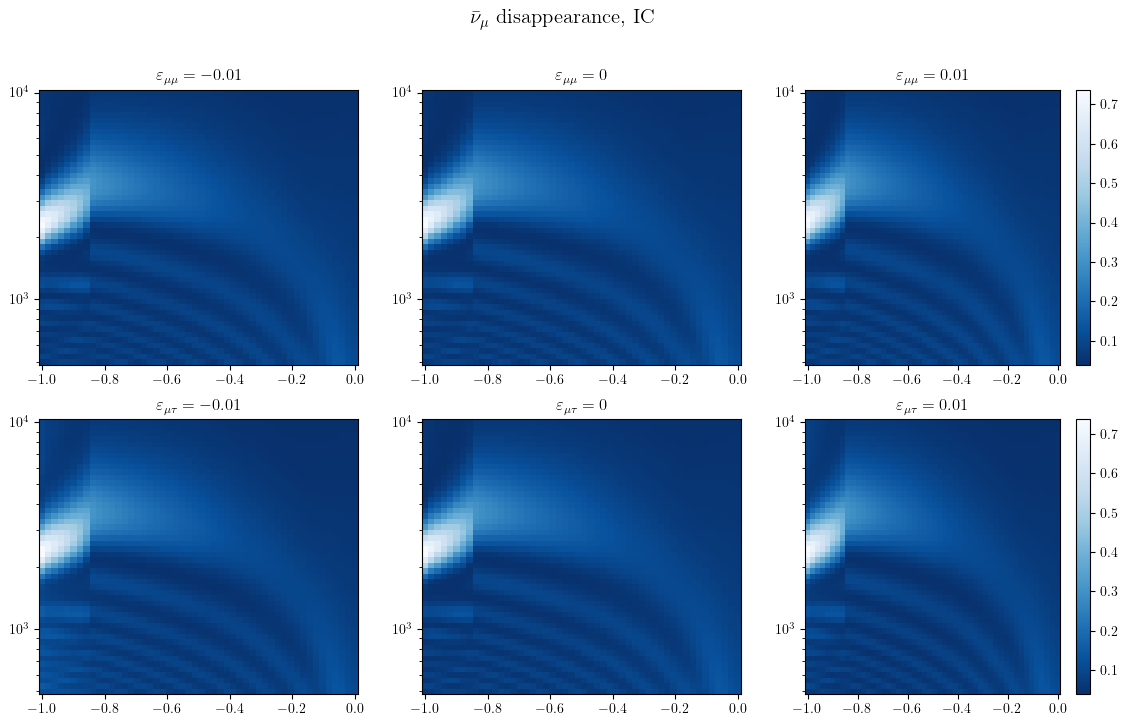

In [50]:
fig, ax = plt.subplots(2,3, figsize=(3.5*4,8))
ax = ax.flatten()
for i in range(3):  
    ax[i].set_title(rf'$\varepsilon_{{\mu\mu}} = {emm_params[i]["e_mm"]}$')
    c=ax[i].pcolormesh(z_range, IC_range,P_emm_IC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i].set_yscale('log')

    ax[i+3].set_title(rf'$\varepsilon_{{\mu\tau}} = {emt_params[i]["e_mt"]}$')
    c=ax[i+3].pcolormesh(z_range, IC_range,P_emt_IC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i+3].set_yscale('log')

    if i == 2:
        fig.colorbar(c, ax=ax[i])
        fig.colorbar(c, ax=ax[i+3])
fig.suptitle(r'$\bar{\nu}_\mu$ disappearance, IC', fontsize=15)

Text(0.5, 0.98, '$\\bar{\\nu}_\\mu$ disappearance, DC')

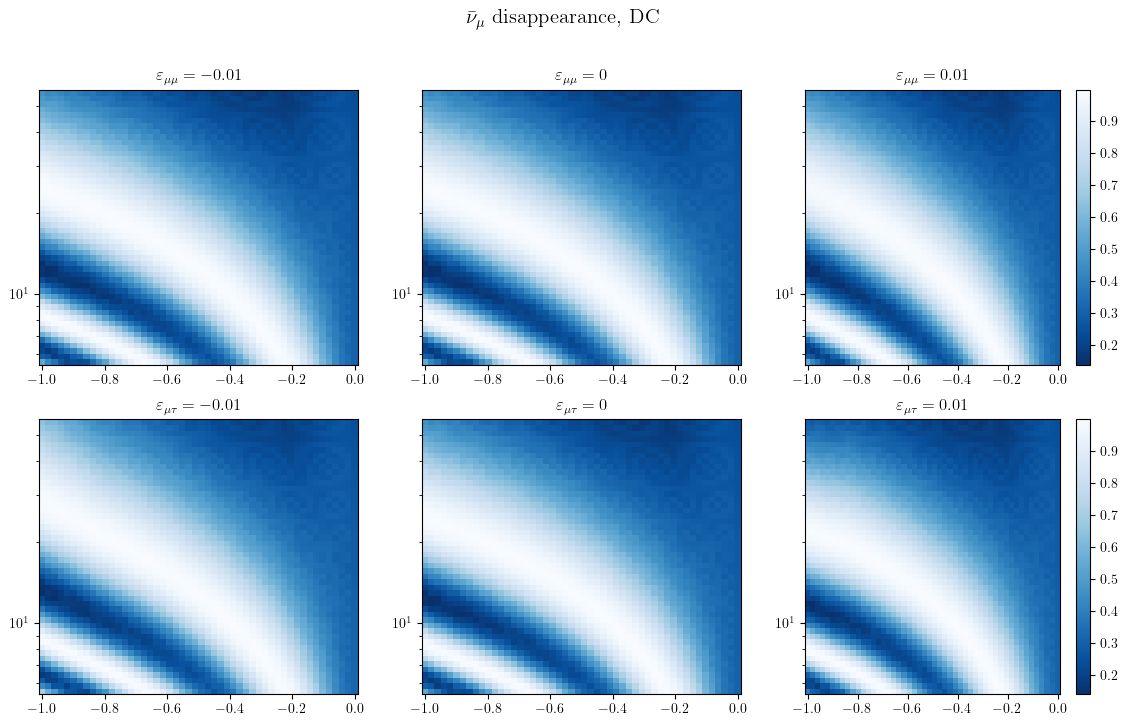

In [51]:
fig, ax = plt.subplots(2,3, figsize=(3.5*4,8))
ax = ax.flatten()
for i in range(3):  
    ax[i].set_title(rf'$\varepsilon_{{\mu\mu}} = {emm_params[i]["e_mm"]}$')
    c=ax[i].pcolormesh(z_range, DC_range,P_emm_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i].set_yscale('log')

    ax[i+3].set_title(rf'$\varepsilon_{{\mu\tau}} = {emt_params[i]["e_mt"]}$')
    c=ax[i+3].pcolormesh(z_range, DC_range,P_emt_DC[i].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
    ax[i+3].set_yscale('log')

    if i == 2:
        fig.colorbar(c, ax=ax[i])
        fig.colorbar(c, ax=ax[i+3])
fig.suptitle(r'$\bar{\nu}_\mu$ disappearance, DC', fontsize=15)

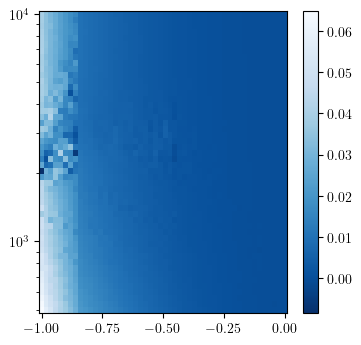

In [55]:
fig, ax = plt.subplots(1, figsize=(4,4))
c=ax.pcolormesh(z_range, IC_range,P_emt_IC[0].T- P_emt_IC[1].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
ax.set_title(rf'$\varepsilon_{{\mu\tau}} absolute difference, IC$')
ax.set_yscale('log')
fig.colorbar(c, ax=ax)

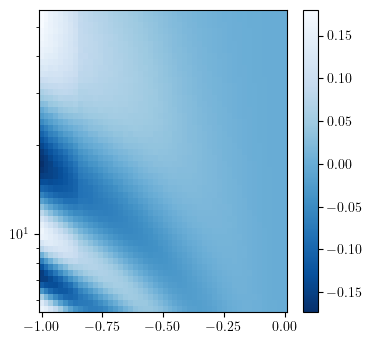

In [54]:
fig, ax = plt.subplots(1, figsize=(4,4))
c=ax.pcolormesh(z_range, DC_range,P_emt_DC[0].T- P_emt_DC[1].T,cmap='Blues_r',edgecolor=None, shading = 'auto')
ax.set_title(rf'$\varepsilon_{{\mu\tau}} absolute difference, DC$')
ax.set_yscale('log')
fig.colorbar(c, ax=ax)